# 🏦 Home Credit Default Risk
## Notebook 1: Data Loading
**Nama:** [Faisal Soultan Muhammad]

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Libraries loaded")

✅ Libraries loaded


## 1. Load Main Data Only

In [8]:
print("="*70)
print("🚀 FAST LOADING - MAIN DATA ONLY")
print("="*70)

# Memory optimization
def optimize_df(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            c_min, c_max = df[col].min(), df[col].max()
            if 'int' in str(df[col].dtype):
                if c_min > -128 and c_max < 127: df[col] = df[col].astype(np.int8)
                elif c_min > -32768 and c_max < 32767: df[col] = df[col].astype(np.int16)
                elif c_min > -2147483648 and c_max < 2147483647: df[col] = df[col].astype(np.int32)
    return df

# Load application data
print("📥 Loading application_train.csv...")
app_train = pd.read_csv('application_train.csv')
print(f"✅ Loaded: {app_train.shape[0]:,} rows, {app_train.shape[1]} cols")

# Optimize
app_train = optimize_df(app_train)

# Quick check
print(f"\n🎯 TARGET DISTRIBUTION:")
target_counts = app_train['TARGET'].value_counts()
for val, count in target_counts.items():
    pct = count/len(app_train)*100
    print(f"  {'Default' if val==1 else 'Non-Default'}: {count:,} ({pct:.1f}%)")

print(f"📊 Imbalance ratio: {target_counts[0]/target_counts[1]:.1f}:1")

🚀 FAST LOADING - MAIN DATA ONLY
📥 Loading application_train.csv...
✅ Loaded: 307,511 rows, 122 cols

🎯 TARGET DISTRIBUTION:
  Non-Default: 282,686 (91.9%)
  Default: 24,825 (8.1%)
📊 Imbalance ratio: 11.4:1


## 2. Quick Data Inspection

In [9]:
print("\n" + "="*70)
print("🔍 QUICK DATA INSPECTION")
print("="*70)

# Basic info
print("1. DATASET INFO:")
print(f"   • Shape: {app_train.shape}")
print(f"   • Memory: {app_train.memory_usage().sum()/1024**2:.1f} MB")

# Column types
num_cols = app_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = app_train.select_dtypes(include=['object']).columns.tolist()
print(f"   • Numerical columns: {len(num_cols)}")
print(f"   • Categorical columns: {len(cat_cols)}")

# Missing values
missing = app_train.isnull().sum()
print(f"\n2. MISSING VALUES:")
print(f"   • Total missing cells: {missing.sum():,}")
print(f"   • Columns with missing: {(missing > 0).sum()}/{len(app_train.columns)}")

# Top 5 missing columns
if missing.sum() > 0:
    missing_pct = (missing/len(app_train))*100
    top_missing = missing_pct.sort_values(ascending=False).head(5)
    print(f"   • Top 5 missing columns:")
    for col, pct in top_missing.items():
        print(f"     {col}: {pct:.1f}%")


🔍 QUICK DATA INSPECTION
1. DATASET INFO:
   • Shape: (307511, 122)
   • Memory: 204.4 MB
   • Numerical columns: 106
   • Categorical columns: 16

2. MISSING VALUES:
   • Total missing cells: 9,152,465
   • Columns with missing: 67/122
   • Top 5 missing columns:
     COMMONAREA_MEDI: 69.9%
     COMMONAREA_AVG: 69.9%
     COMMONAREA_MODE: 69.9%
     NONLIVINGAPARTMENTS_MODE: 69.4%
     NONLIVINGAPARTMENTS_AVG: 69.4%


## 3. Save for Next Steps

In [10]:
print("\n" + "="*70)
print("💾 SAVING DATA")
print("="*70)

import pickle

# Save application data
with open('app_train.pkl', 'wb') as f:
    pickle.dump(app_train, f)
print("✅ Saved: app_train.pkl")

# Save metadata
metadata = {
    'shape': app_train.shape,
    'target_counts': target_counts.to_dict(),
    'num_cols': num_cols,
    'cat_cols': cat_cols,
    'missing_summary': missing[missing>0].to_dict()
}

with open('metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)
print("✅ Saved: metadata.pkl")


💾 SAVING DATA
✅ Saved: app_train.pkl
✅ Saved: metadata.pkl


## 4. Quick Visualization


📈 QUICK VISUALIZATION


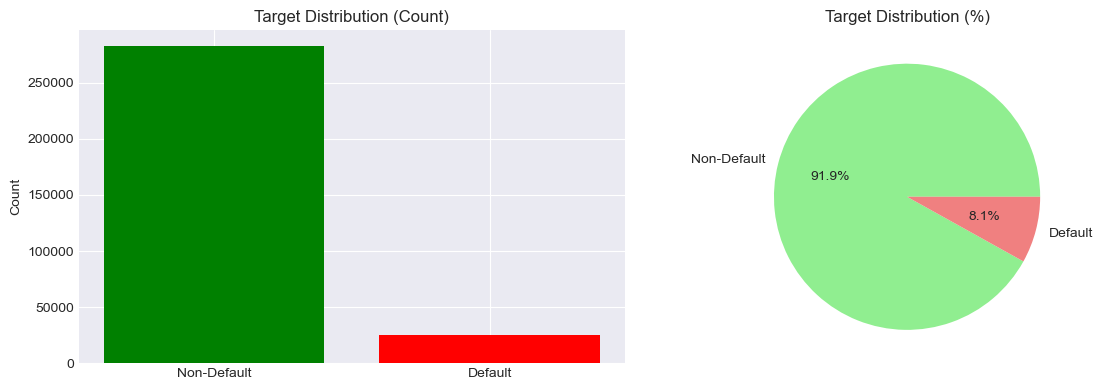

✅ Chart saved: target_distribution.png


In [11]:
print("\n" + "="*70)
print("📈 QUICK VISUALIZATION")
print("="*70)

# Target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart
axes[0].bar(['Non-Default', 'Default'], target_counts.values, color=['green', 'red'])
axes[0].set_title('Target Distribution (Count)')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(target_counts.values, labels=['Non-Default', 'Default'], 
           autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
axes[1].set_title('Target Distribution (%)')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=100, bbox_inches='tight')
plt.show()
print("✅ Chart saved: target_distribution.png")


## 🎯 NEXT STEPS - READY!

**Notebook 1 selesai**

**Lanjut ke Notebook 2:** `02_eda_application.ipynb`

In [15]:
print("\n" + "="*70)
print("✅ NOTEBOOK 1 COMPLETED!")
print("="*70)
print("\n🎯 Data loaded successfully")
print("📊 Basic analysis done")
print("💾 Data saved for next steps")
print("\n➡️  NEXT: Create '02_eda_application.ipynb'")


✅ NOTEBOOK 1 COMPLETED!

🎯 Data loaded successfully
📊 Basic analysis done
💾 Data saved for next steps

➡️  NEXT: Create '02_eda_application.ipynb'
